# Alucar - Análise de Vendas

In [95]:
import pandas as pd

In [96]:
alucar = pd.read_csv('data/alucar.csv')

In [97]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [98]:
print(f'{alucar.shape[0]} linhas e {alucar.shape[1]} colunas.')

24 linhas e 2 colunas.


In [99]:
print('Dados nulos: ', alucar.isna().sum().sum())

Dados nulos:  0


In [100]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [101]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [102]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [103]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

<AxesSubplot:xlabel='mes', ylabel='vendas'>

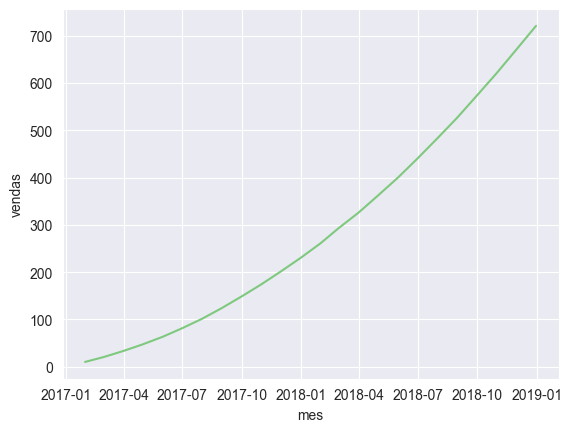

In [104]:
sns.lineplot(alucar, x='mes', y='vendas')

In [105]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

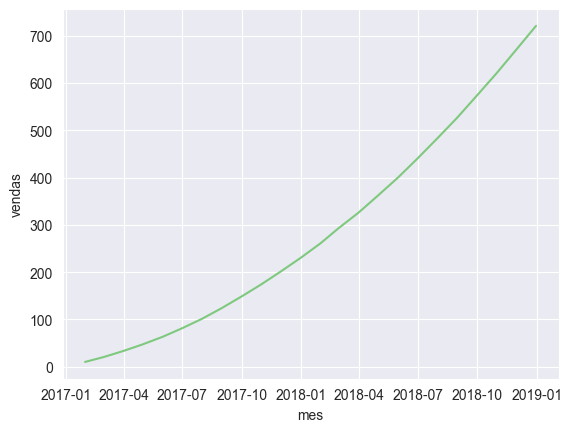

In [106]:
alucar_aumento = sns.lineplot(alucar, x='mes', y='vendas')

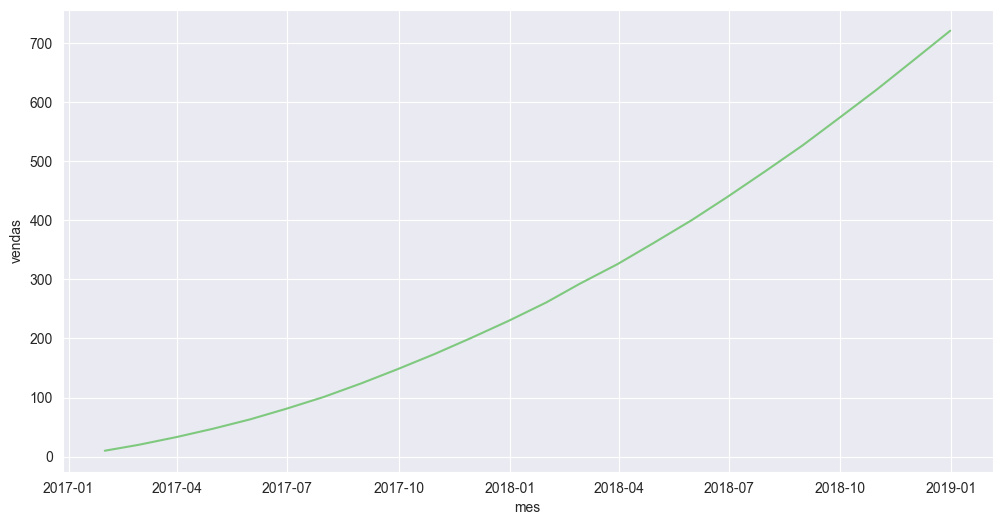

In [107]:
alucar_aumento.figure.set_size_inches(12,6)
alucar_aumento.figure

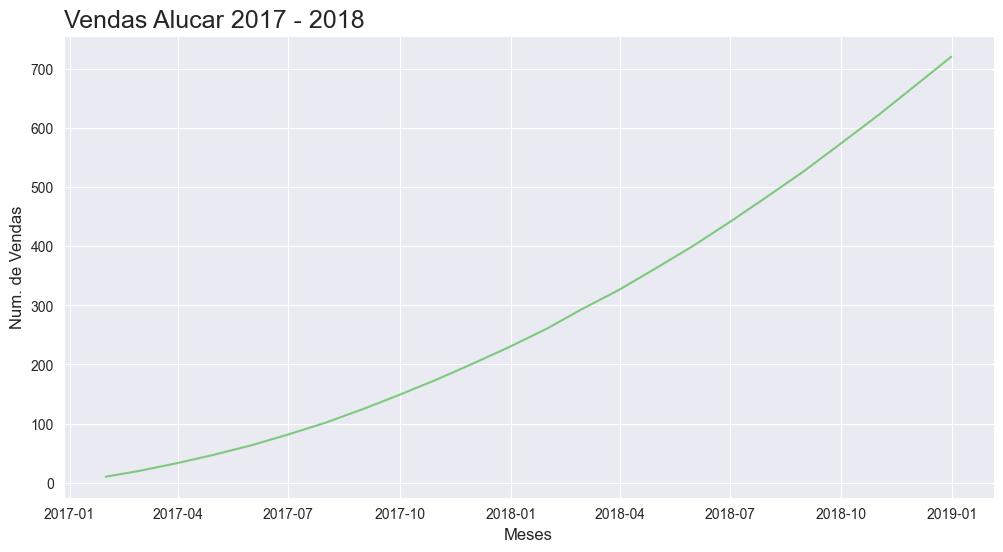

In [108]:
alucar_aumento.set_title('Vendas Alucar 2017 - 2018', loc='left', fontsize=18)
alucar_aumento.set_xlabel('Meses', fontsize = 12)
alucar_aumento.set_ylabel('Num. de Vendas', fontsize = 12)
alucar_aumento.figure

In [109]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [110]:
alucar['aumento'] = alucar['vendas'].diff()

In [111]:
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


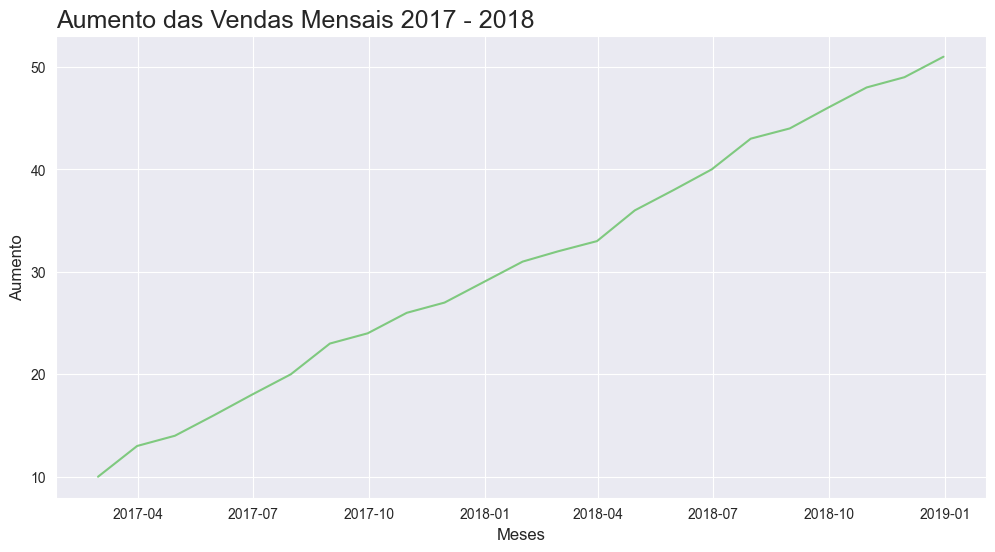

In [112]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
alucar_aumento = sns.lineplot(alucar, x='mes', y='aumento')
alucar_aumento.figure.set_size_inches(12,6)
alucar_aumento.set_title('Aumento das Vendas Mensais 2017 - 2018', loc='left', fontsize=18)
alucar_aumento.set_xlabel('Meses', fontsize = 12)
alucar_aumento.set_ylabel('Aumento', fontsize = 12)
alucar_aumento = alucar_aumento

In [113]:
def plotar(dataset, x, y, titulo, labelx, labely):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    graph = sns.lineplot(dataset, x=x, y=y)
    graph.figure.set_size_inches(12,6)
    graph.set_title(titulo, loc='left', fontsize=18)
    graph.set_xlabel(labelx, fontsize = 12)
    graph.set_ylabel(labely, fontsize = 12)

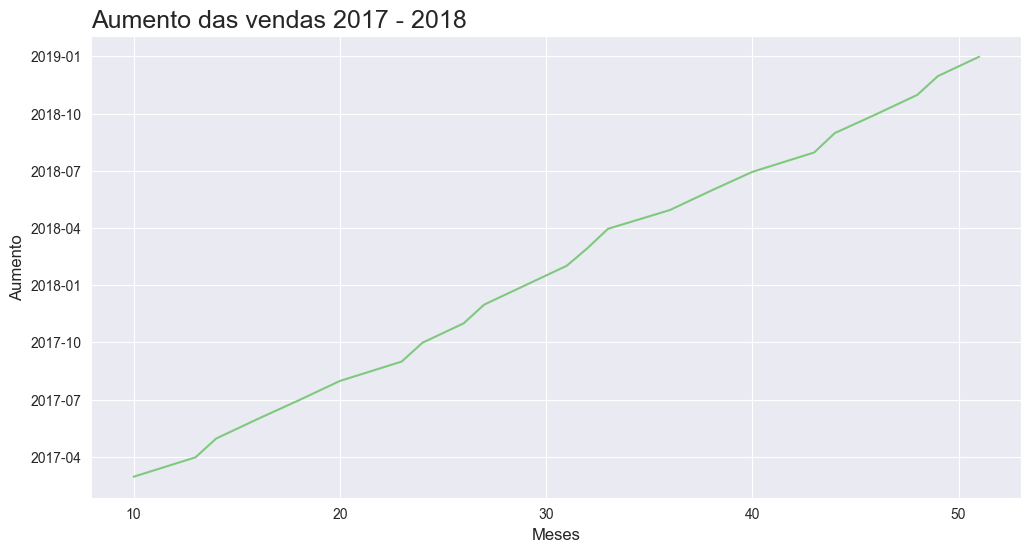

In [114]:
plotar(alucar,'aumento','mes','Aumento das vendas 2017 - 2018', 'Meses', 'Aumento')

In [115]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


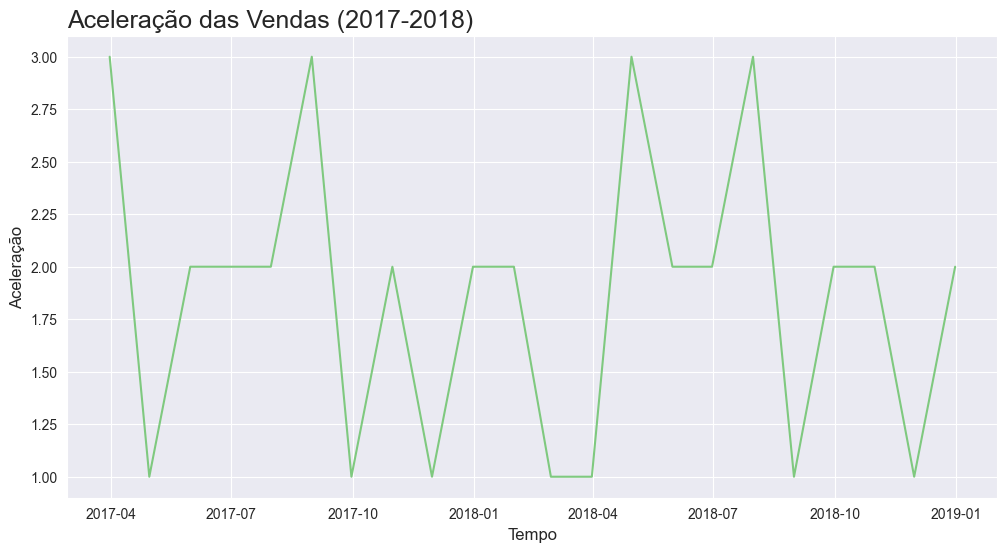

In [116]:
alucar_acel = plotar(alucar, 'mes', 'aceleracao', 'Aceleração das Vendas (2017-2018)', 'Tempo', 'Aceleração')

<AxesSubplot:title={'left':'Aceleração do Aumento de Vendas'}, xlabel='mes', ylabel='aceleracao'>

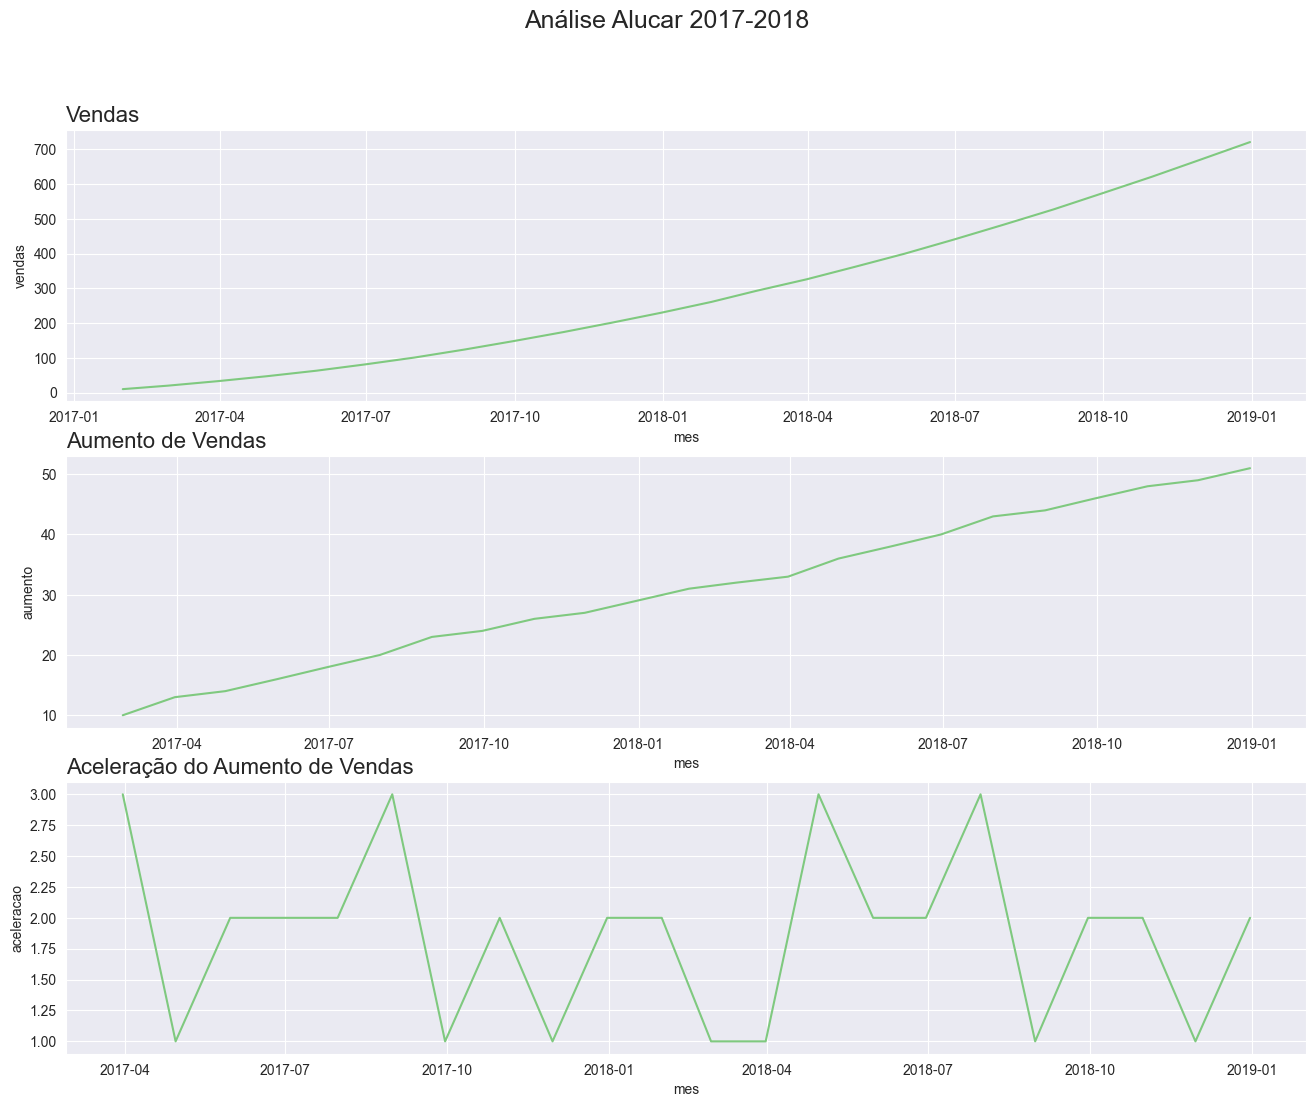

In [117]:
graficos = plt.figure(figsize=(16,12))
graficos.suptitle('Análise Alucar 2017-2018', fontsize = 18)
alucar_venda= plt.subplot(3,1,1)
alucar_venda.set_title('Vendas', fontsize = 16, loc='left')
sns.lineplot(alucar, x='mes', y='vendas')
alucar_aumento = plt.subplot(3,1,2)
alucar_aumento.set_title('Aumento de Vendas', fontsize = 16, loc='left')
sns.lineplot(alucar, x='mes', y='aumento')
alucar_aceleracao = plt.subplot(3,1,3)
alucar_aceleracao.set_title('Aceleração do Aumento de Vendas', fontsize = 16, loc='left')
sns.lineplot(alucar, x='mes', y='aceleracao')

In [118]:
def plot_comparacao(dataset, x, y1, y2, y3, titulo, subt1, subt2, subt3):
    graficos = plt.figure(figsize=(16,12))
    graficos.suptitle(titulo, fontsize = 18)
    alucar_venda= plt.subplot(3,1,1)
    alucar_venda.set_title(subt1, fontsize = 16, loc='left')
    sns.lineplot(data = dataset, x=x, y=y1)
    alucar_aumento = plt.subplot(3,1,2)
    alucar_aumento.set_title(subt2, fontsize = 16, loc='left')
    sns.lineplot(data = dataset, x=x, y=y2)
    alucar_aceleracao = plt.subplot(3,1,3)
    alucar_aceleracao.set_title(subt3, fontsize = 16, loc='left')
    sns.lineplot(data = dataset, x=x, y=y3)

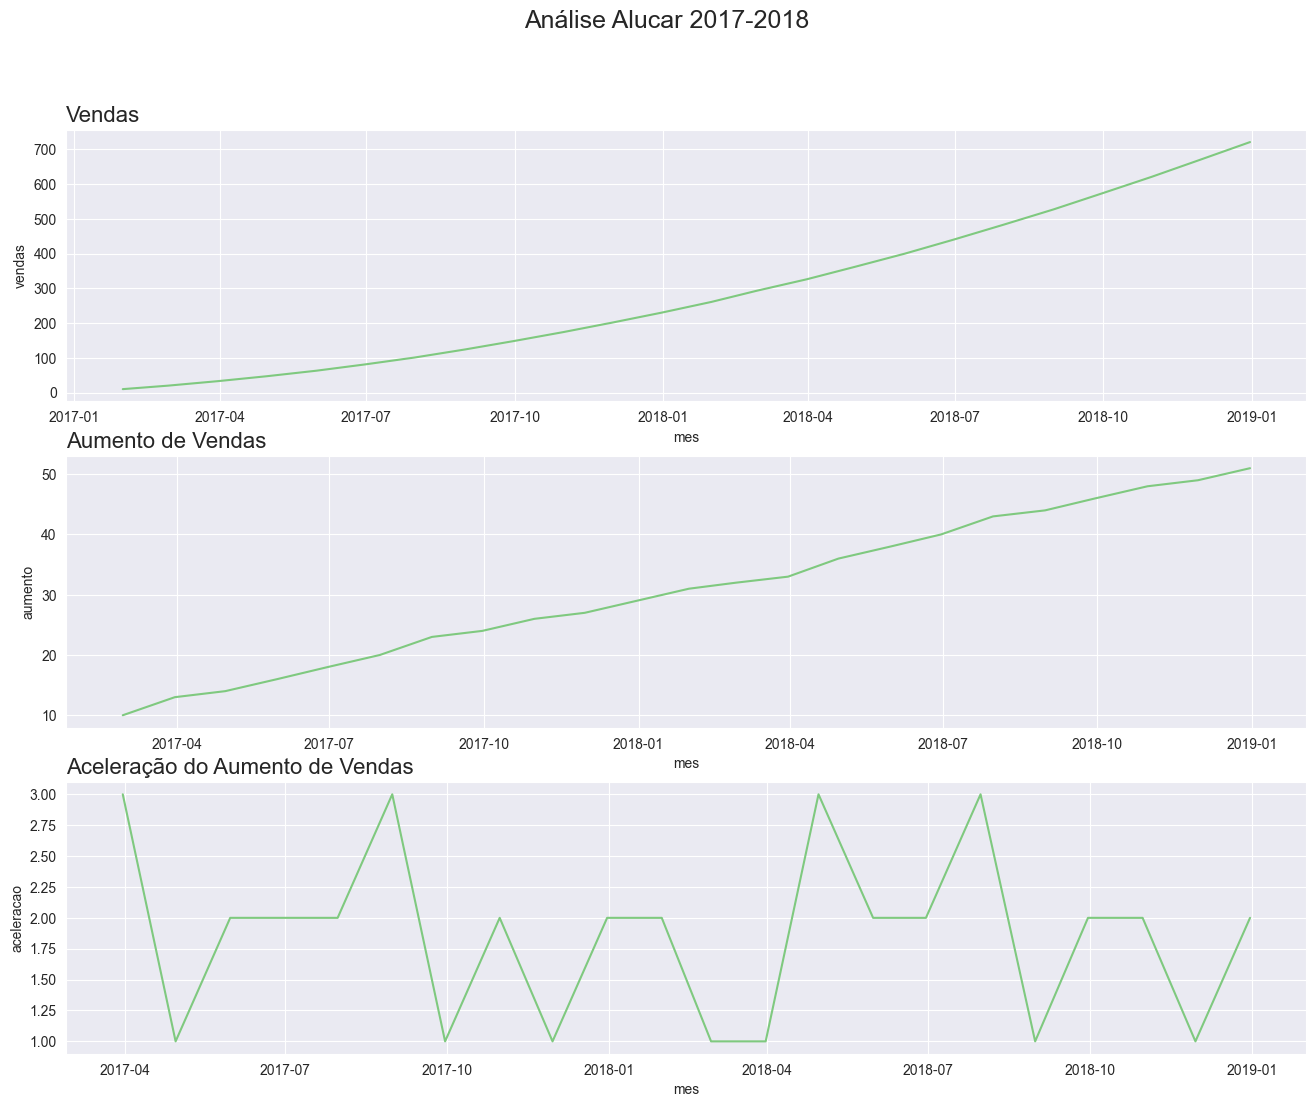

In [119]:
plot_comparacao(alucar, 'mes', 'vendas', 'aumento', 'aceleracao', 'Análise Alucar 2017-2018', 'Vendas', 'Aumento de Vendas', 'Aceleração do Aumento de Vendas')

In [120]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

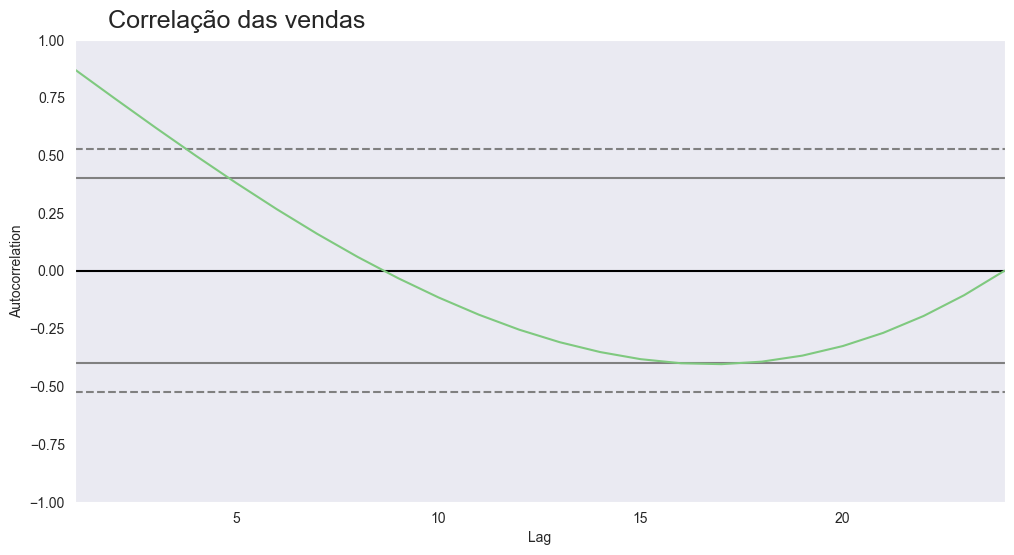

In [121]:
autocorrel = plt.figure(figsize=(12,6))
autocorrel.suptitle('Correlação das vendas', fontsize = 18, x=0.26, y=0.93)
autocorrelation_plot(alucar['vendas'])


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

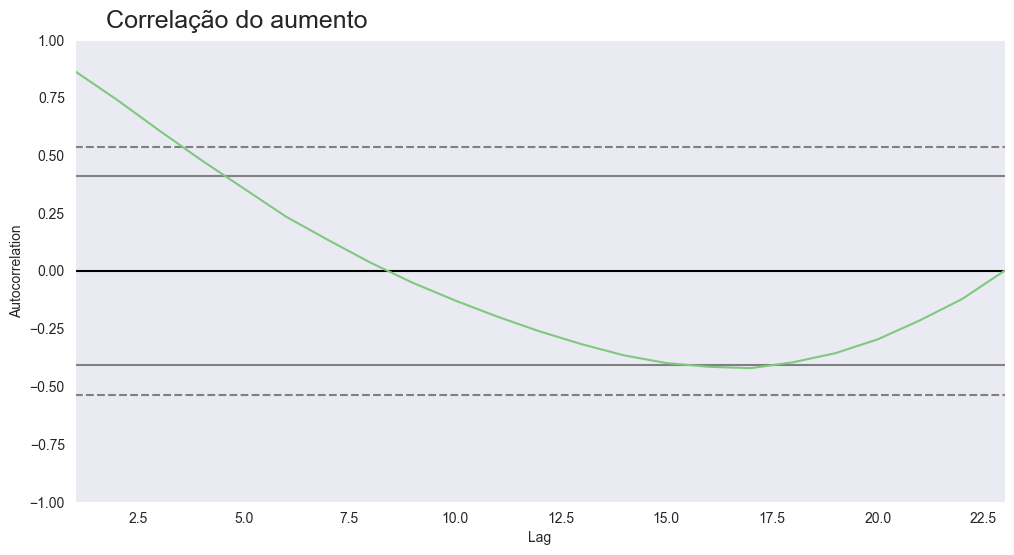

In [122]:
autocorrel = plt.figure(figsize=(12,6))
autocorrel.suptitle('Correlação do aumento', fontsize = 18, x=0.26, y=0.93)
autocorrelation_plot(alucar['aumento'][1:])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

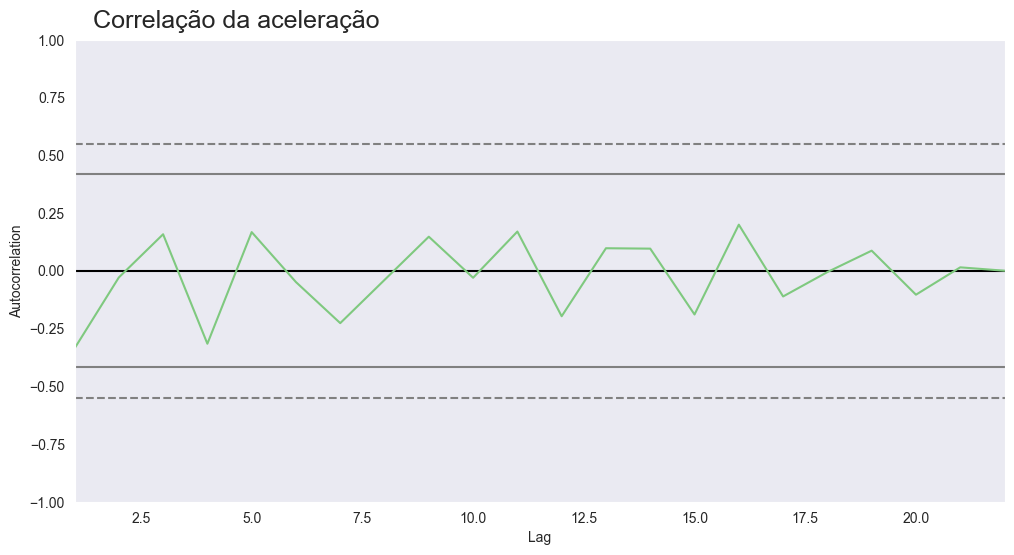

In [123]:
autocorrel = plt.figure(figsize=(12,6))
autocorrel.suptitle('Correlação da aceleração', fontsize = 18, x=0.26, y=0.93)
autocorrelation_plot(alucar['aceleracao'][2:])

# Aluca - Assinantes da Newsletter

In [124]:
assinantes = pd.read_csv('data/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [125]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [126]:
print('Quantidade de linhas e colunas:', assinantes.shape)
print('Quantidade de dados nulos:', assinantes.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


In [127]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [128]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()

In [129]:
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


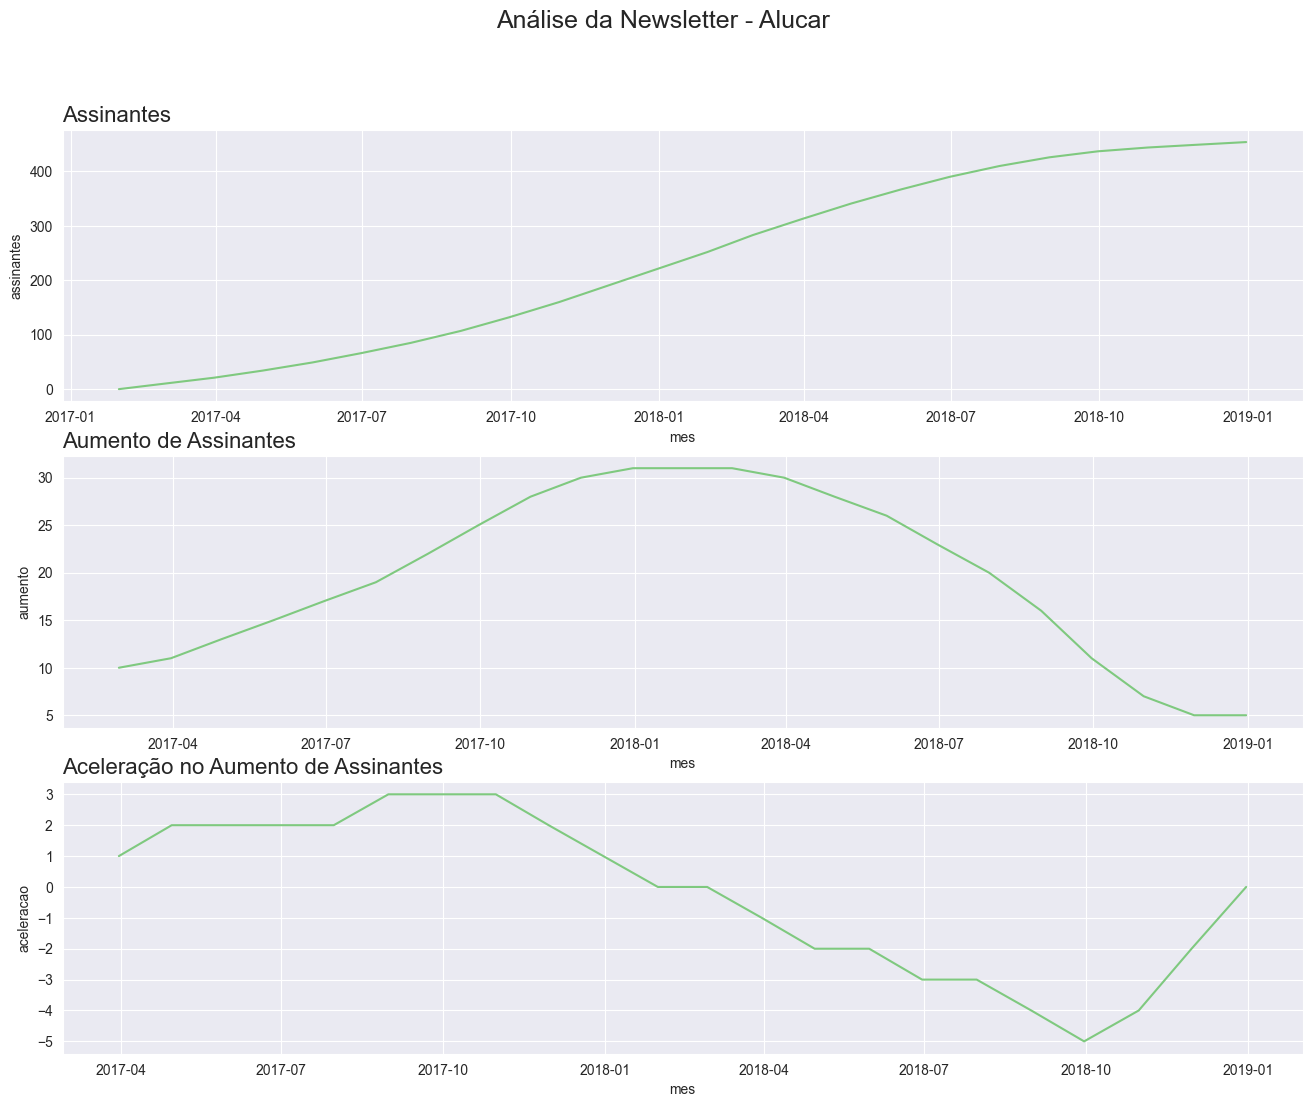

In [130]:
plot_comparacao(assinantes,'mes','assinantes', 'aumento', 'aceleracao', 'Análise da Newsletter - Alucar', 'Assinantes', 'Aumento de Assinantes', 'Aceleração no Aumento de Assinantes')

# Chocolura - Análise de Vendas 

In [131]:
chocolura = pd.read_csv('data/chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [132]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [133]:
chocolura['mes'] = pd.to_datetime(chocolura.mes)

In [134]:
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [135]:
print('Quantidade de linhas e colunas:', chocolura.shape)
print('Quantidade de dados nulos:', chocolura.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


In [136]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


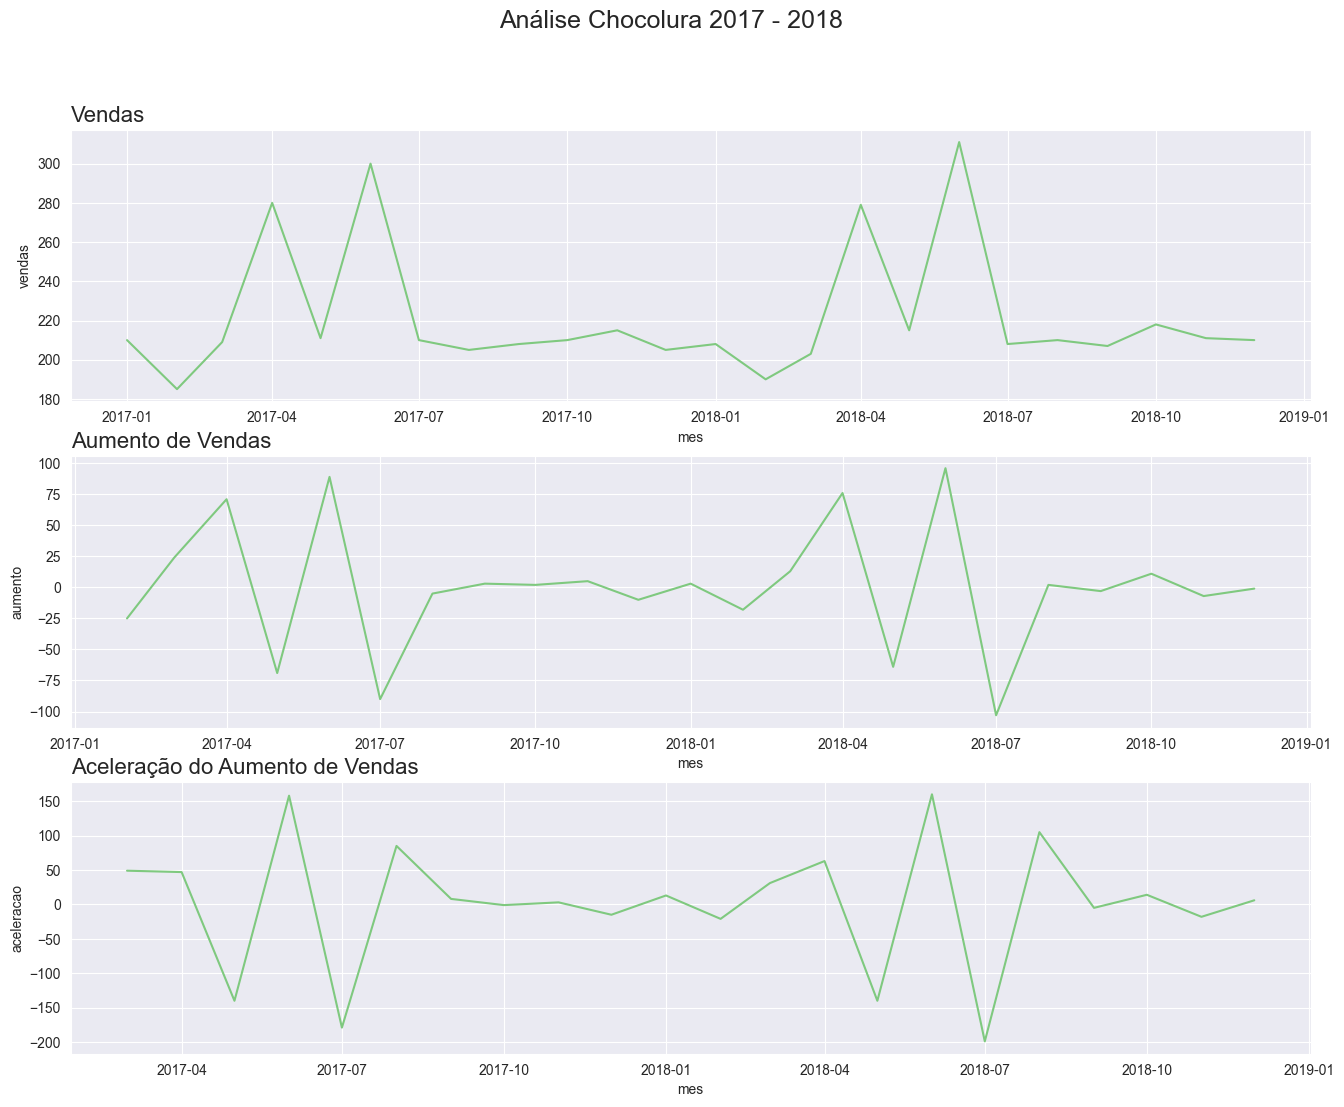

In [137]:
plot_comparacao(chocolura, 'mes', 'vendas', 'aumento', 'aceleracao', 'Análise Chocolura 2017 - 2018', 'Vendas', 'Aumento de Vendas', 'Aceleração do Aumento de Vendas')

# Chocolura - Vendas Diárias (Outubro e Novembro)

In [138]:
vendas_por_dia_chocolura = pd.read_csv('data/vendas_por_dia.csv')
vendas_por_dia_chocolura.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [139]:
print('Quantidade de linhas e colunas:', vendas_por_dia_chocolura.shape)
print('Quantidade de dados nulos:', vendas_por_dia_chocolura.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [140]:
vendas_por_dia_chocolura.dtypes

dia       object
vendas     int64
dtype: object

In [141]:
vendas_por_dia_chocolura['dia'] = pd.to_datetime(vendas_por_dia_chocolura.dia)
vendas_por_dia_chocolura.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [142]:
vendas_por_dia_chocolura['aumento'] = vendas_por_dia_chocolura['vendas'].diff()
vendas_por_dia_chocolura['aceleracao'] = vendas_por_dia_chocolura.aumento.diff()
vendas_por_dia_chocolura.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


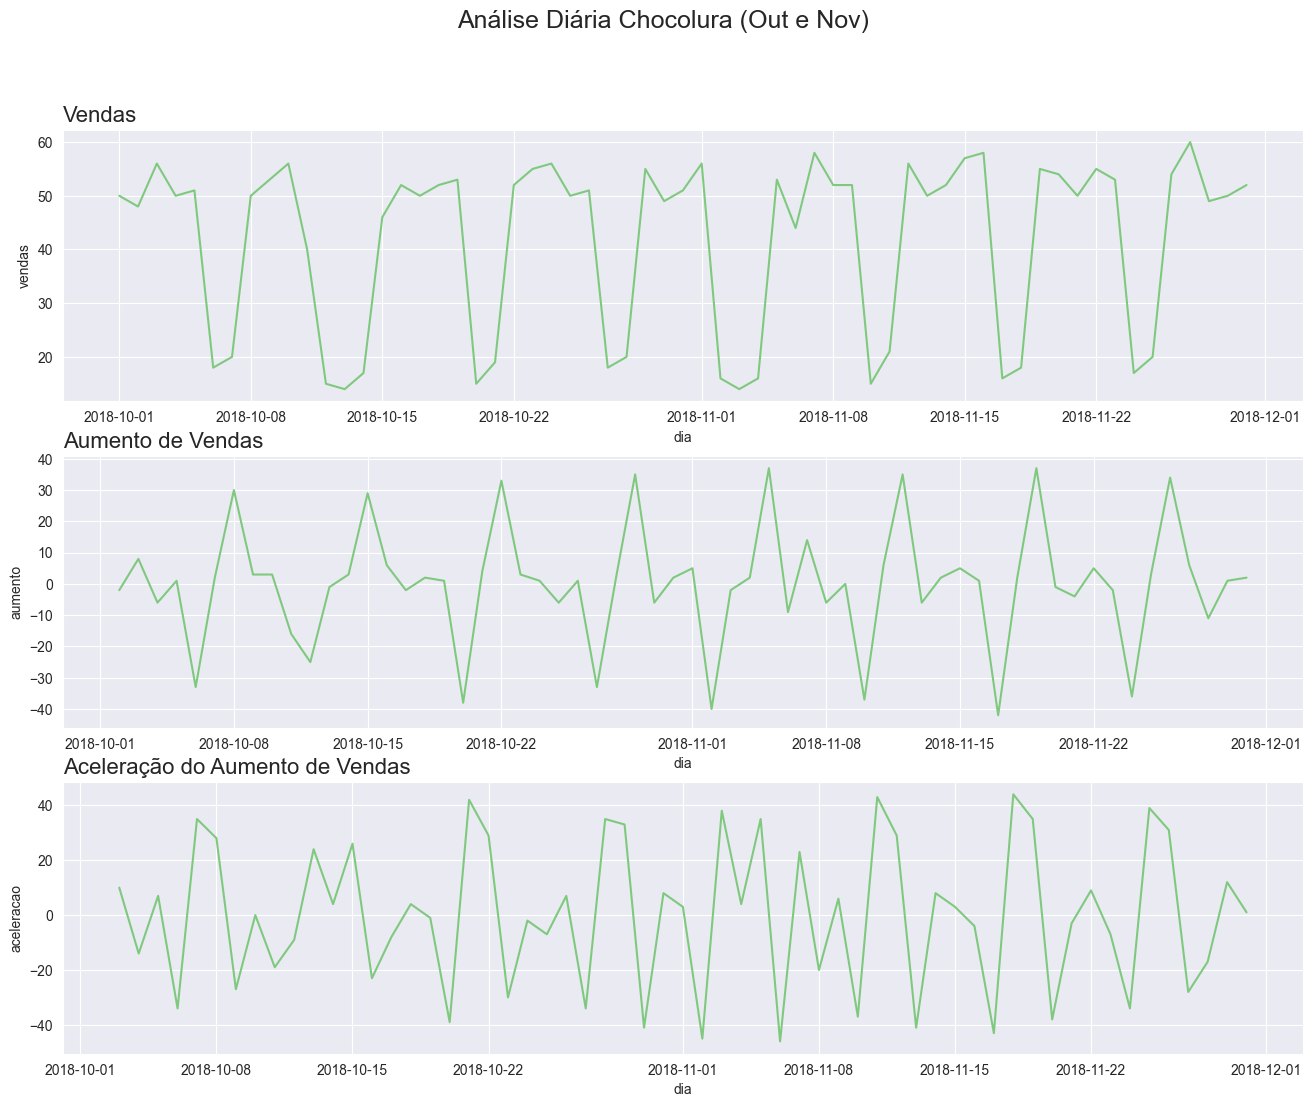

In [143]:
plot_comparacao(vendas_por_dia_chocolura, 'dia', 'vendas', 'aumento', 'aceleracao', 'Análise Diária Chocolura (Out e Nov)', 'Vendas', 'Aumento de Vendas', 'Aceleração do Aumento de Vendas')

**Analisando a sazonalidade**

In [144]:
vendas_por_dia_chocolura['dia_da_semana'] = vendas_por_dia_chocolura['dia'].dt.day_name()
vendas_por_dia_chocolura.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [145]:
vendas_por_dia_chocolura['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [146]:
dias_traduzidos = {'Monday': 'Segunda', 'Tuesday': 'Terça', 'Wednesday': 'Quarta', 'Thursday': 'Quinta', 'Friday': 'Sexta', 'Saturday': 'Sábado', 'Sunday': 'Domingo'}

In [147]:
vendas_por_dia_chocolura['dia_da_semana'].replace(dias_traduzidos, inplace=True)

In [148]:
vendas_por_dia_chocolura.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sábado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terça
9,2018-10-10,56,3.0,0.0,Quarta


**Agrupando os Dias**

In [149]:
vendas_agrupadas = vendas_por_dia_chocolura.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()

C:\Users\Matheus\AppData\Local\Temp\ipykernel_19600\2632057022.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas = vendas_por_dia_chocolura.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()


In [150]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-34.0


**Correlação das vendas diárias**

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

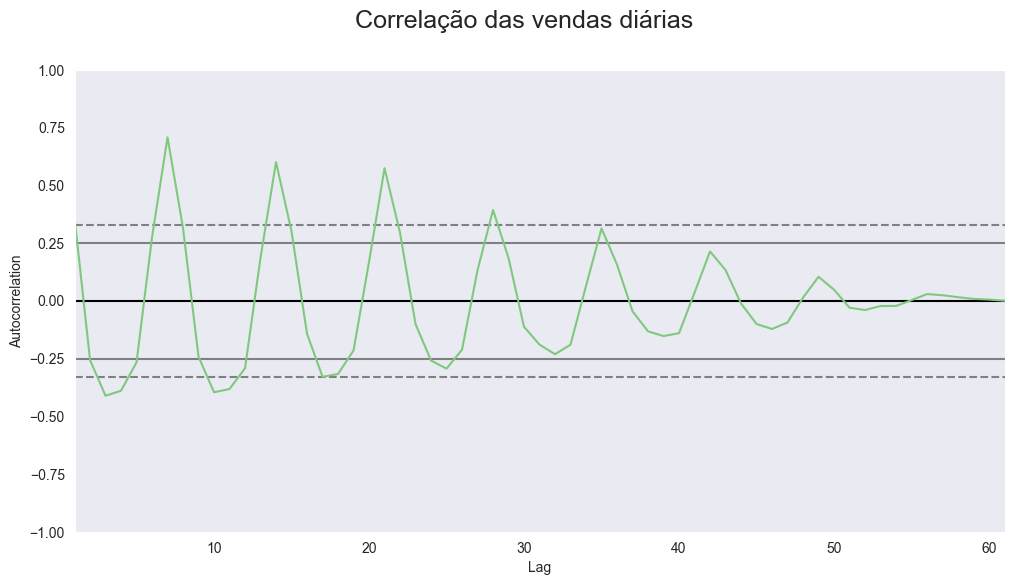

In [151]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize = 18)
autocorrelation_plot(vendas_por_dia_chocolura['vendas'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

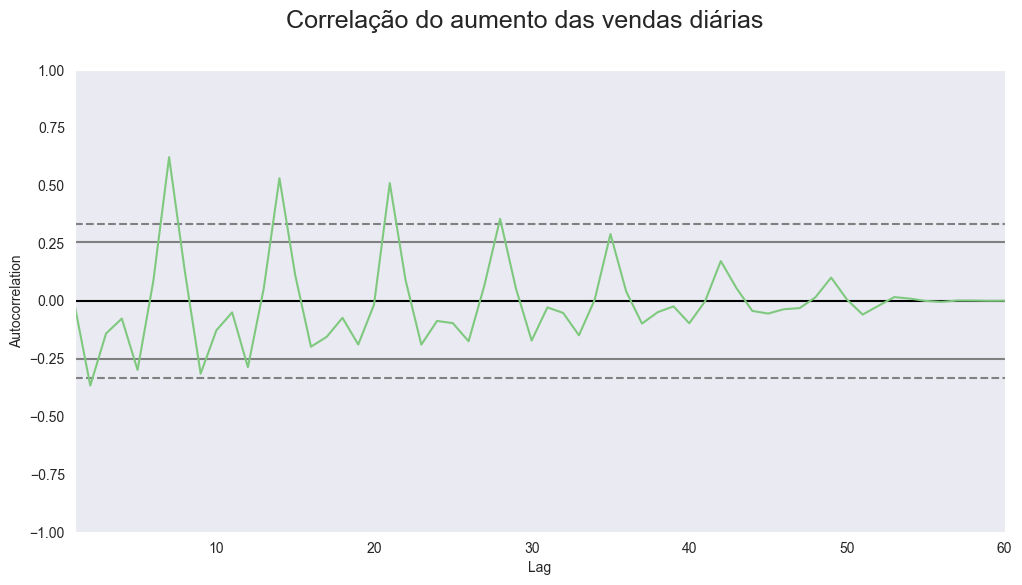

In [152]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize = 18)
autocorrelation_plot(vendas_por_dia_chocolura['aumento'][1:])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

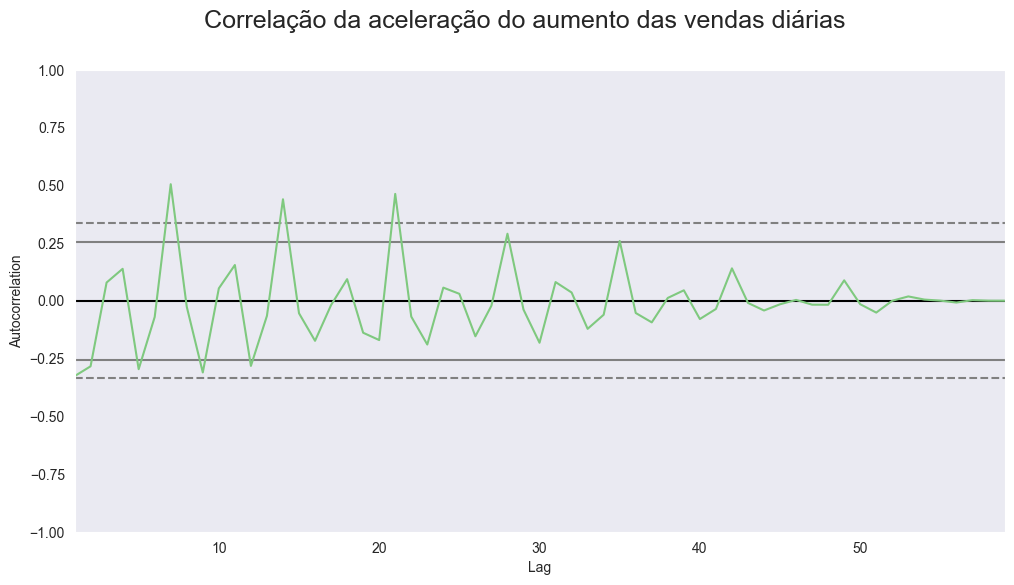

In [153]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração do aumento das vendas diárias', fontsize = 18)
autocorrelation_plot(vendas_por_dia_chocolura['aceleracao'][2:])

# Cafélura - Análise de Vendas

In [154]:
cafelura = pd.read_csv('data/cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [155]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])

In [156]:
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [157]:
print('Quantidade de linhas e colunas:', cafelura.shape)
print('Quantidade de dados nulos:',cafelura.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


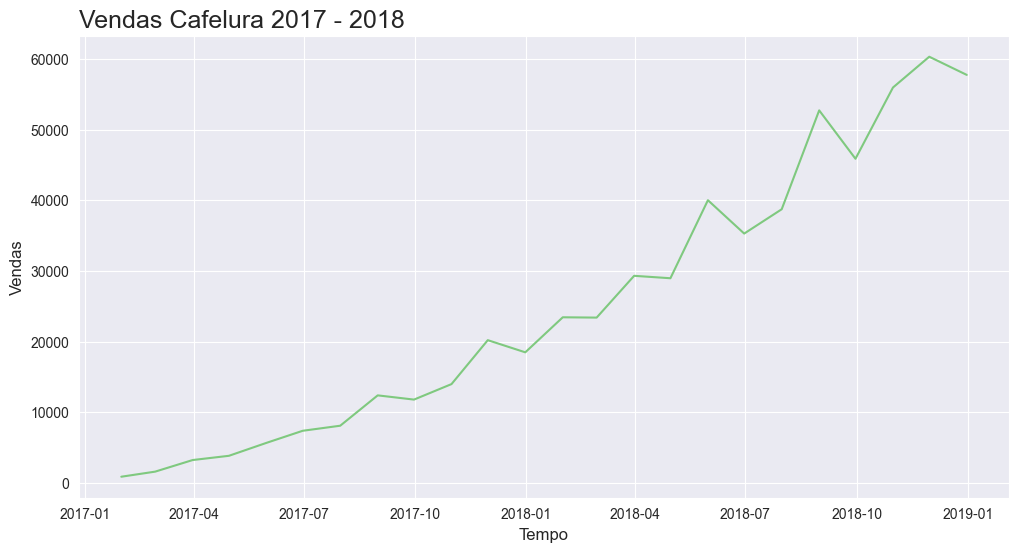

In [158]:
plotar(cafelura, 'mes', 'vendas', 'Vendas Cafelura 2017 - 2018', 'Tempo', 'Vendas')

In [159]:
finais_de_semana = pd.read_csv('data/dias_final_de_semana.csv')
finais_de_semana.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [160]:
finais_de_semana['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [161]:
cafelura['vendas_normalizadas'] = cafelura.vendas/finais_de_semana['quantidade_de_dias'].values

In [162]:
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


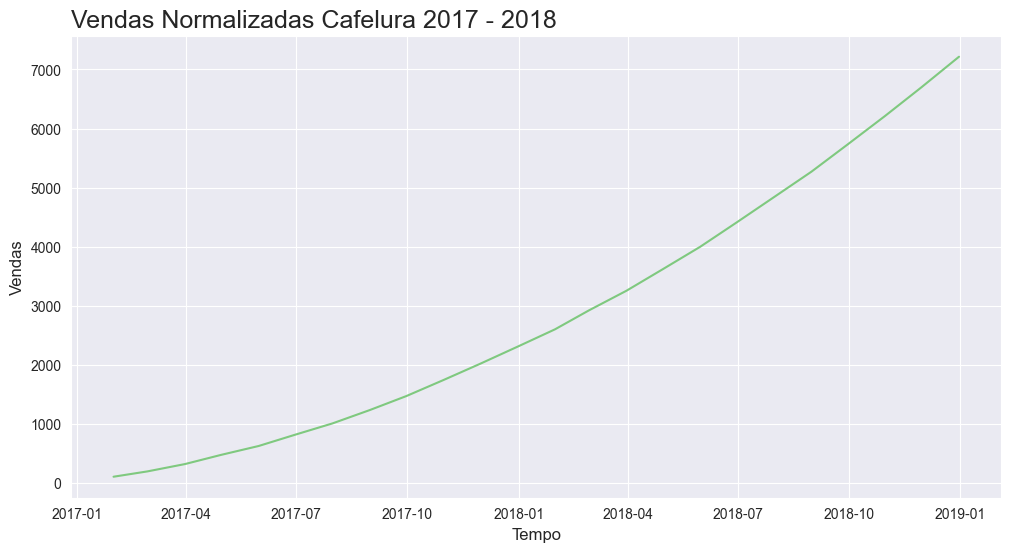

In [163]:
plotar(cafelura, 'mes', 'vendas_normalizadas', 'Vendas Normalizadas Cafelura 2017 - 2018', 'Tempo', 'Vendas')

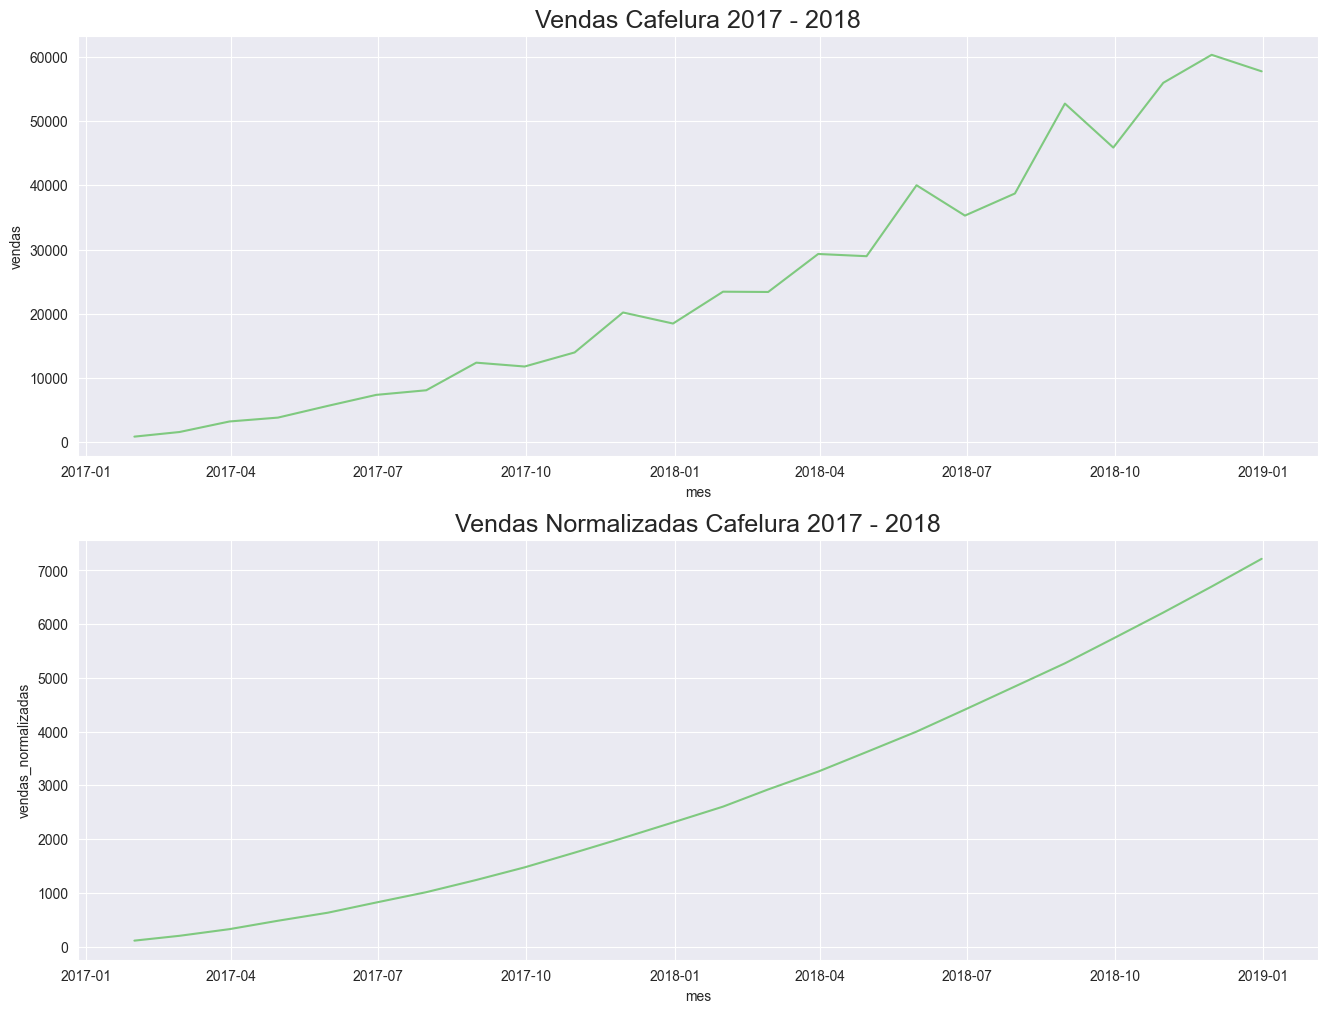

In [164]:
plt.figure(figsize = (16,12))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 - 2018', fontsize = 18)
sns.lineplot(cafelura, x='mes', y='vendas')
ax = plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas Cafelura 2017 - 2018', fontsize = 18)
sns.lineplot(cafelura, x='mes', y='vendas_normalizadas')
ax=ax

# Statsmodels

In [165]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [170]:
chocolura['vendas'].shape

(24,)

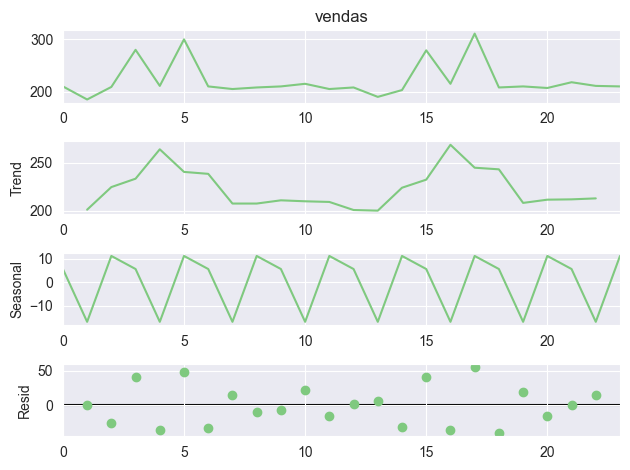

In [192]:
resultado = seasonal_decompose(chocolura['vendas'], period=3)
ax = resultado.plot()


In [193]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [194]:
data = ({'observacao': observacao, 'tendencia': tendencia, 'sazonalidade': sazonalidade, 'ruido': ruido})


In [195]:
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


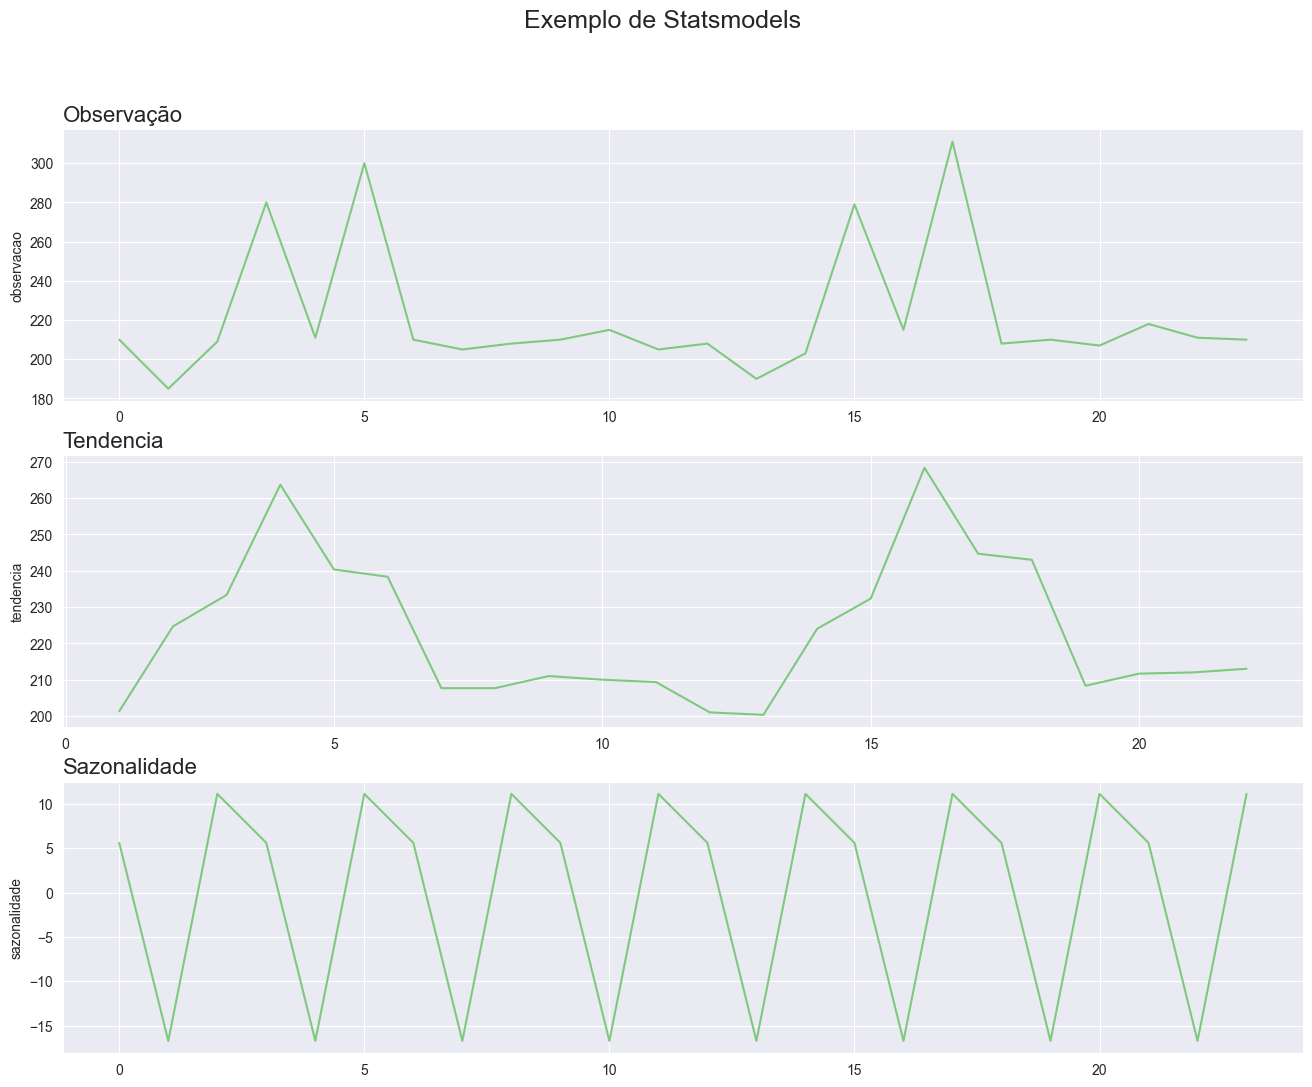

In [198]:
plot_comparacao(resultado, resultado.index, 'observacao', 'tendencia', 'sazonalidade', 'Exemplo de Statsmodels','Observação','Tendencia','Sazonalidade')

# Alucel - Análise de Vendas

In [199]:
alucel = pd.read_csv('data/alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [200]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [201]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [202]:
print('Quantidade de linhas e colunas:', alucel.shape)
print('Quantidade de dados nulos:', alucel.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [203]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleração'] = alucel['aumento'].diff()

In [204]:
alucel.head()

,dia,vendas,aumento,aceleração
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


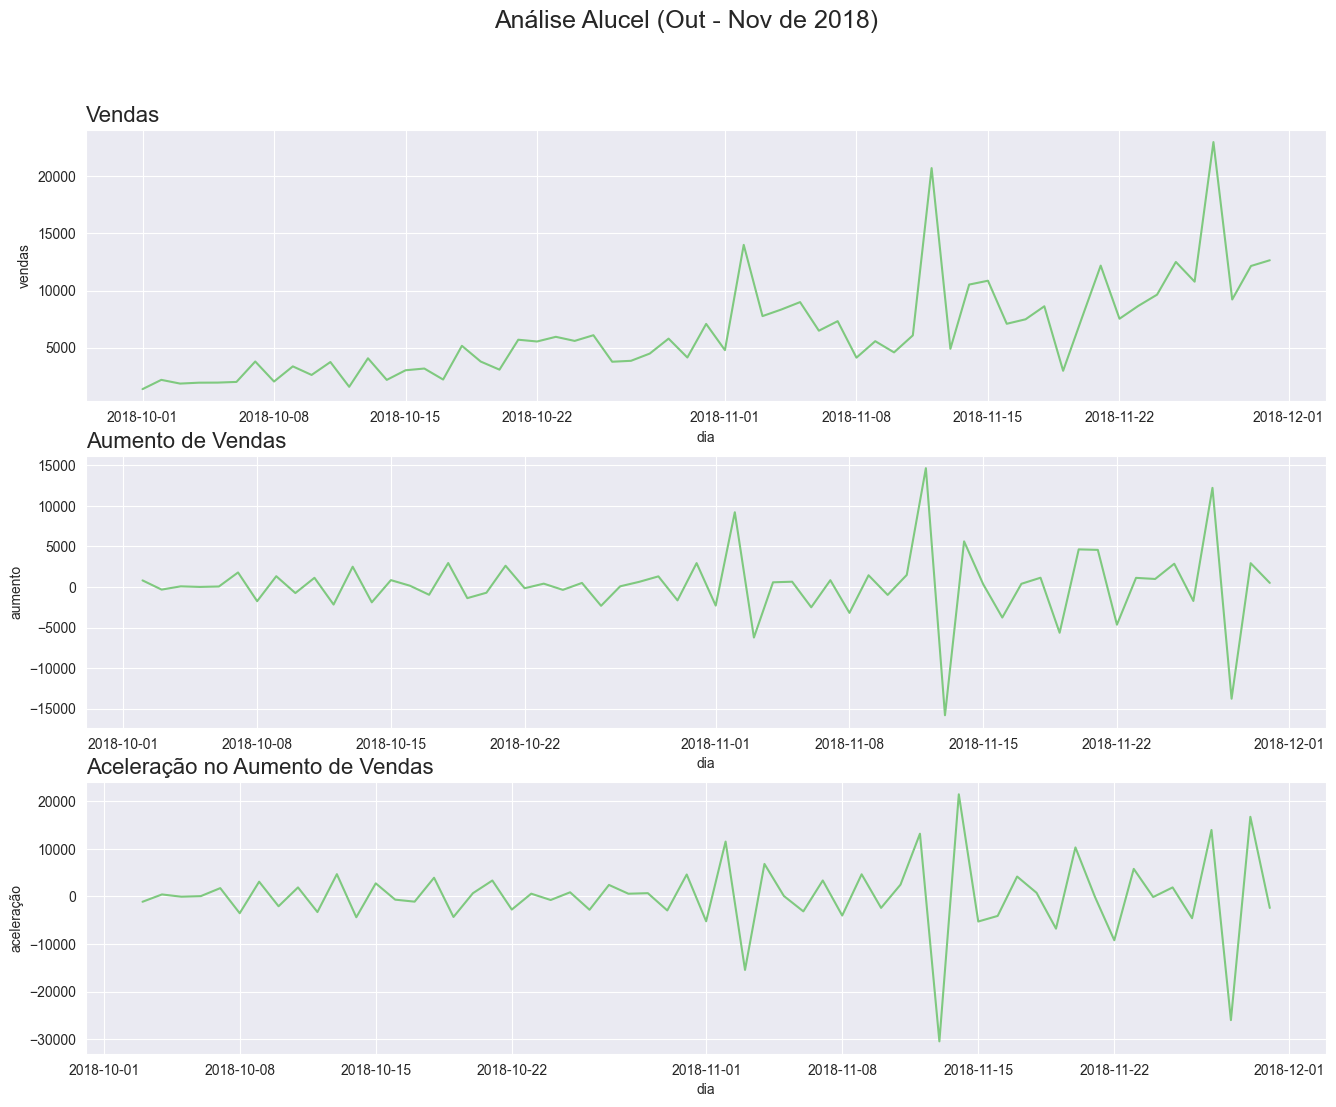

In [206]:
plot_comparacao(alucel, 'dia', 'vendas', 'aumento', 'aceleração', 'Análise Alucel (Out - Nov de 2018)', 'Vendas', 'Aumento de Vendas', 'Aceleração no Aumento de Vendas')

**Média Móvel**

In [208]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()
alucel.head(7)

,dia,vendas,aumento,aceleração,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


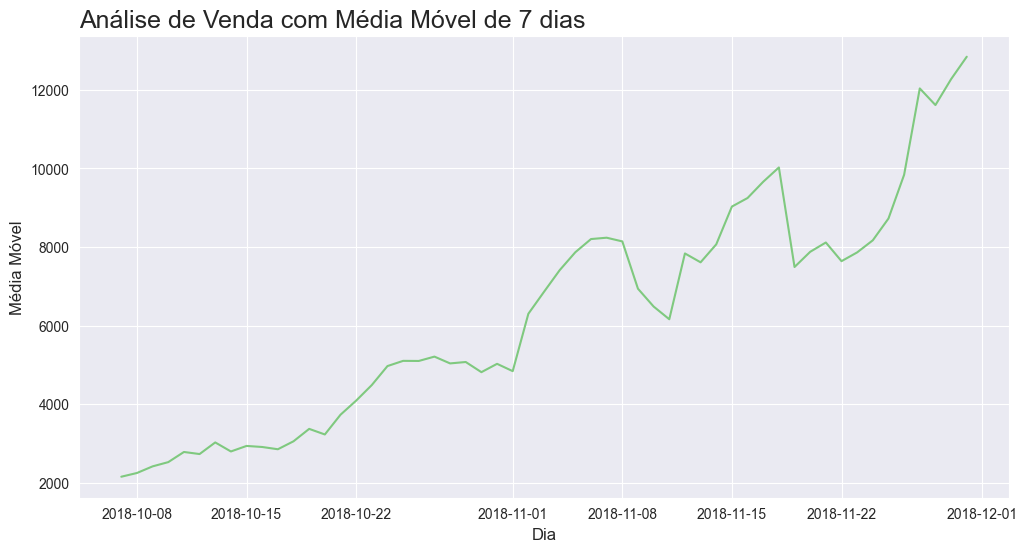

In [209]:
plotar(alucel,'dia','media_movel','Análise de Venda com Média Móvel de 7 dias', 'Dia', 'Média Móvel')

In [210]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

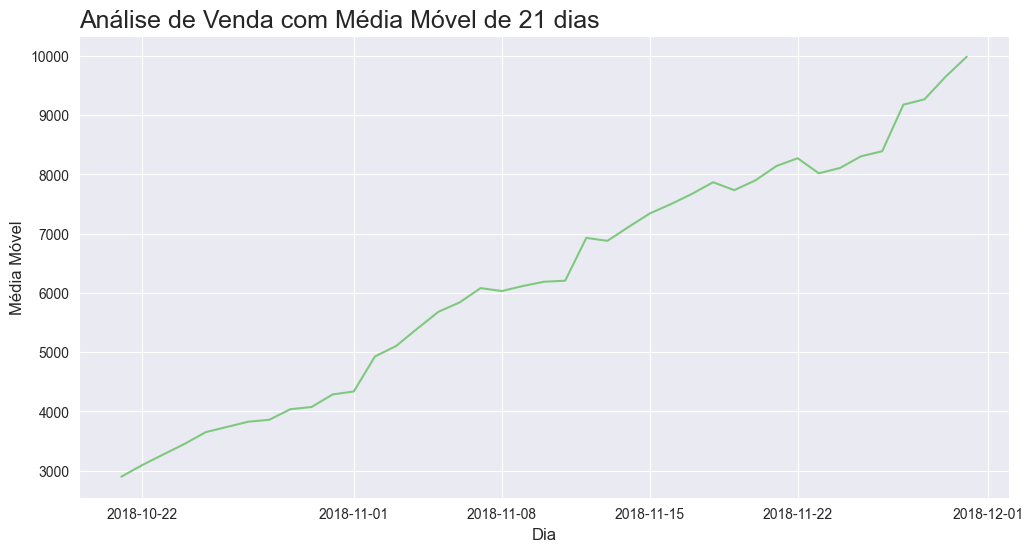

In [211]:
plotar(alucel,'dia','media_movel_21','Análise de Venda com Média Móvel de 21 dias', 'Dia', 'Média Móvel')

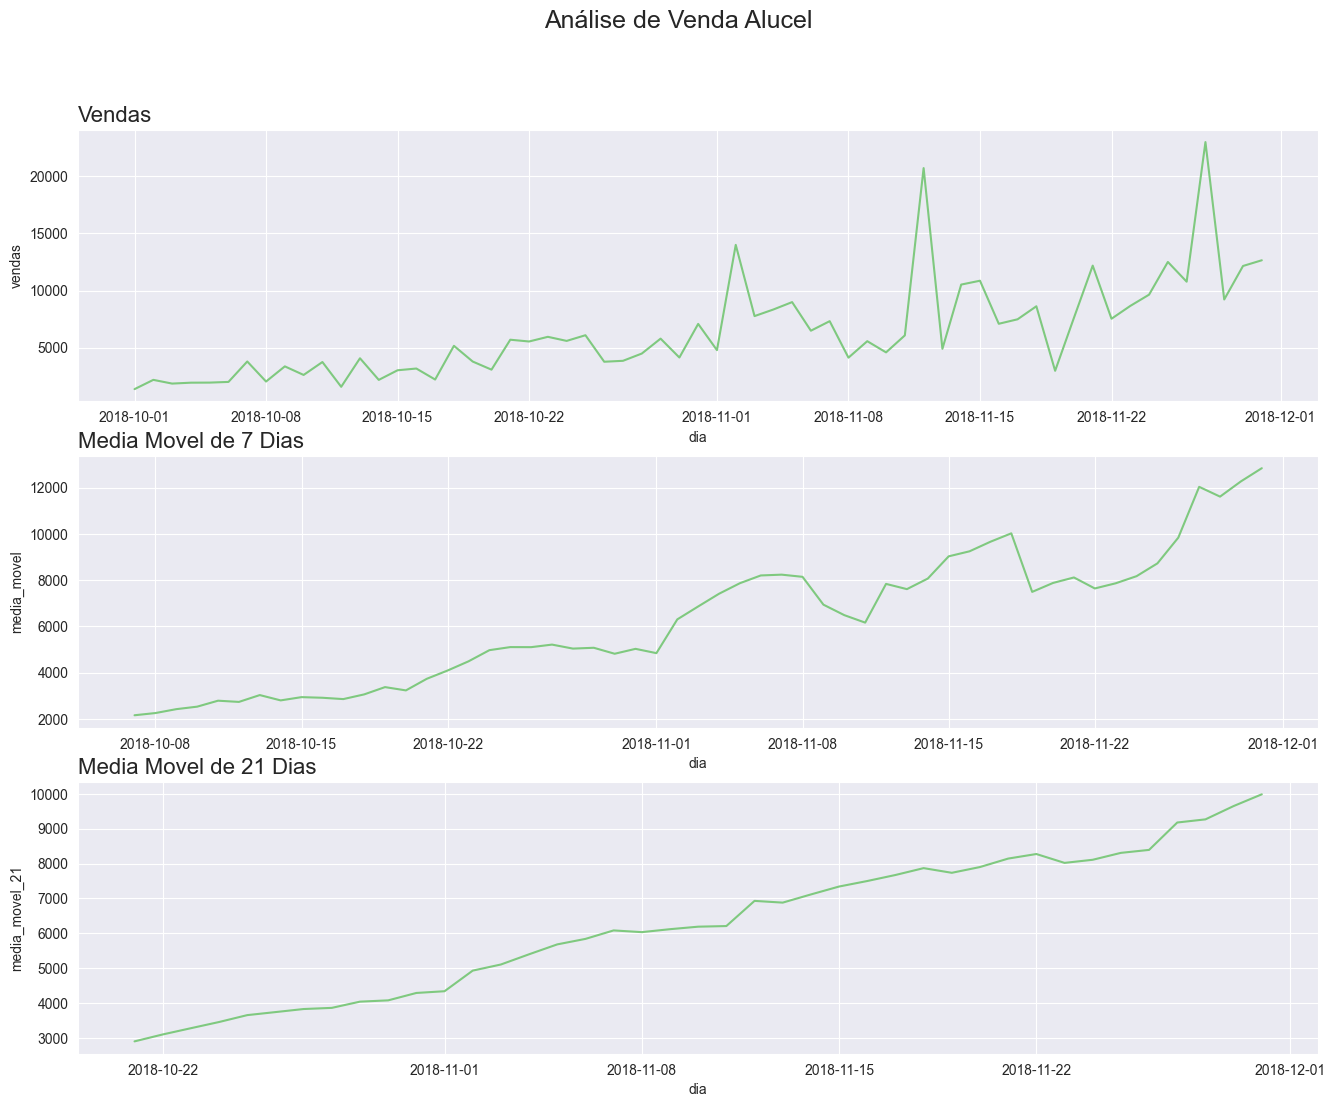

In [212]:
plot_comparacao(alucel,'dia','vendas','media_movel','media_movel_21','Análise de Venda Alucel', 'Vendas', 'Media Movel de 7 Dias', 'Media Movel de 21 Dias')